In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

In [2]:
import random
#Seed with N-number of Maggie Xu
random.seed(19329713)

### Data Preparation

In [3]:
df = pd.read_csv('spotify52kData.csv')
df.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
star_ratings = pd.read_csv('starRatings.csv', header = None)
ratings_data = star_ratings.fillna(0)
ratings_data.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1) Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

In [5]:
df.isna().sum()

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
# Calculate the Pearson Correlation Coefficient
correlation, p_value = pearsonr(df['duration'], df['popularity'])

# Display the correlation
print("Correlation Coefficient:", correlation)
print("P-value:", p_value)

Correlation Coefficient: -0.05465119593637635
P-value: 1.069160283049238e-35


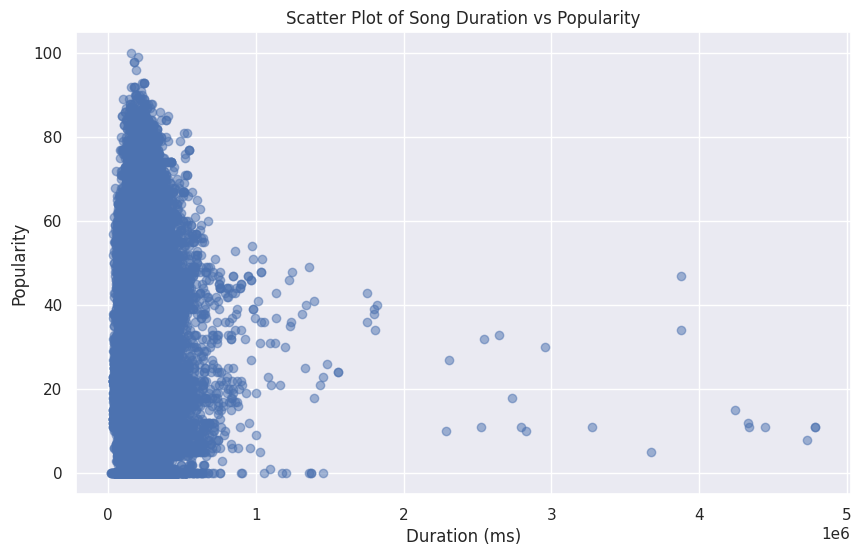

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['popularity'], alpha=0.5)
plt.title('Scatter Plot of Song Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

### 2) Are explicitly rated songs more popular than songs that are not explicit?

In [8]:
# Segmenting the data into explicit and non-explicit groups
explicit_songs = df[df['explicit'] == True]
non_explicit_songs = df[df['explicit'] == False]

# Calculating average popularity for each group
avg_popularity_explicit = explicit_songs['popularity'].mean()
avg_popularity_non_explicit = non_explicit_songs['popularity'].mean()

avg_popularity_explicit, avg_popularity_non_explicit


(35.81311416830445, 32.790595435639936)

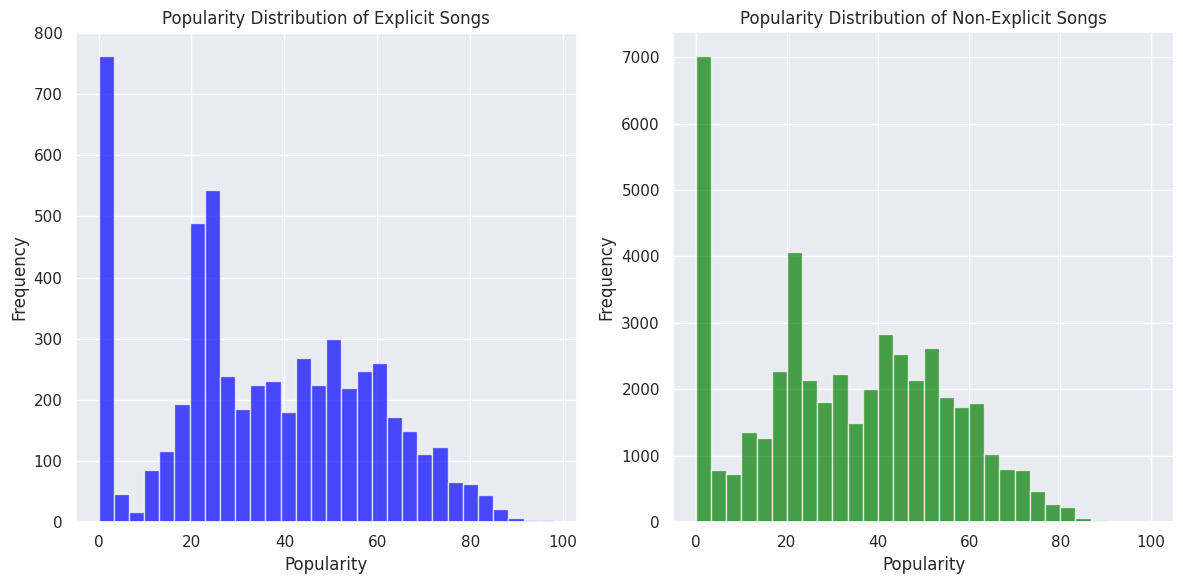

In [9]:
# Plotting histograms for the popularity of explicit and non-explicit songs
plt.figure(figsize=(12, 6))

# Histogram for explicit songs
plt.subplot(1, 2, 1)
plt.hist(explicit_songs['popularity'], bins=30, color='blue', alpha=0.7)
plt.title('Popularity Distribution of Explicit Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Histogram for non-explicit songs
plt.subplot(1, 2, 2)
plt.hist(non_explicit_songs['popularity'], bins=30, color='green', alpha=0.7)
plt.title('Popularity Distribution of Non-Explicit Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


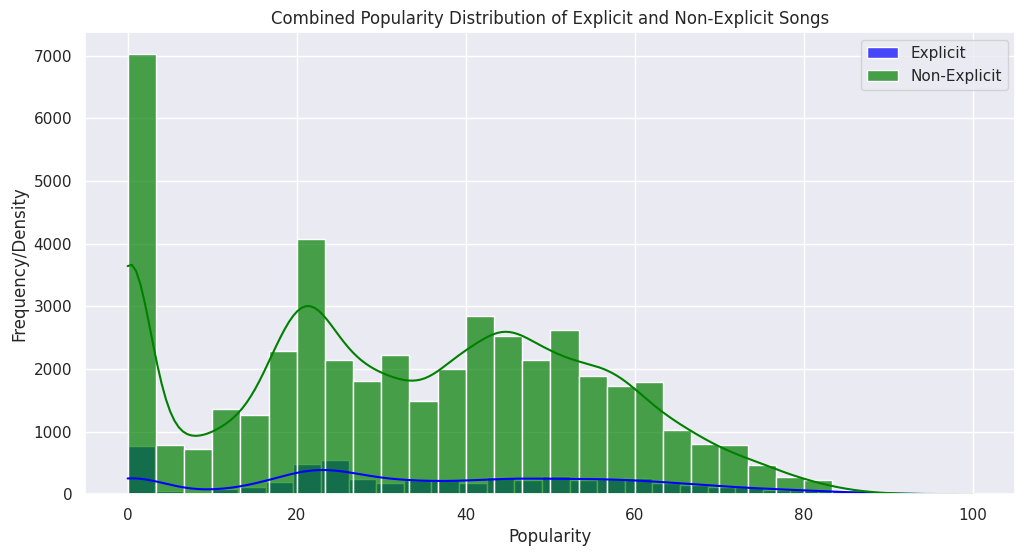

In [10]:
# Combining the histograms into a single plot and adding a density curve

plt.figure(figsize=(12, 6))

# Histogram and density for explicit songs
sns.histplot(explicit_songs['popularity'], bins=30, color='blue', kde=True, label='Explicit', alpha=0.7)

# Histogram and density for non-explicit songs
sns.histplot(non_explicit_songs['popularity'], bins=30, color='green', kde=True, label='Non-Explicit', alpha=0.7)

plt.title('Combined Popularity Distribution of Explicit and Non-Explicit Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency/Density')
plt.legend()

plt.show()


In [11]:

t_statistic, p_value = stats.ttest_ind(explicit_songs['popularity'], non_explicit_songs['popularity'], equal_var=True, alternative='greater')
print(f"t-statistic: {t_statistic}, p-value: {p_value}")


t-statistic: 9.832950458671839, p-value: 4.250551719953934e-23


### 3) Are songs in major key more popular than songs in minor key?

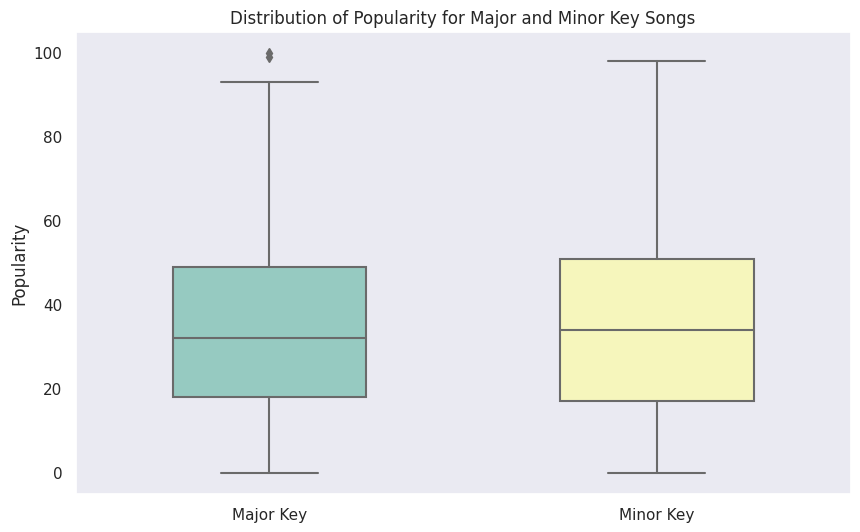

(32.75838967614461, 33.70651231577337, 32.0, 34.0)

In [12]:
# Segmenting the data based on the mode (major or minor key)
major_key_songs = df[df['mode'] == 1]
minor_key_songs = df[df['mode'] == 0]

# Calculating average and median popularity for both groups
avg_popularity_major = major_key_songs['popularity'].mean()
avg_popularity_minor = minor_key_songs['popularity'].mean()
median_popularity_major = major_key_songs['popularity'].median()
median_popularity_minor = minor_key_songs['popularity'].median()

# Preparing data for box plot
popularity_data_by_key = [major_key_songs['popularity'], minor_key_songs['popularity']]
labels_by_key = ['Major Key', 'Minor Key']

# Creating box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=popularity_data_by_key, width=0.5, palette="Set3")
plt.xticks([0, 1], labels_by_key)
plt.title('Distribution of Popularity for Major and Minor Key Songs')
plt.ylabel('Popularity')
plt.grid(axis='y')

plt.show()

avg_popularity_major, avg_popularity_minor, median_popularity_major, median_popularity_minor


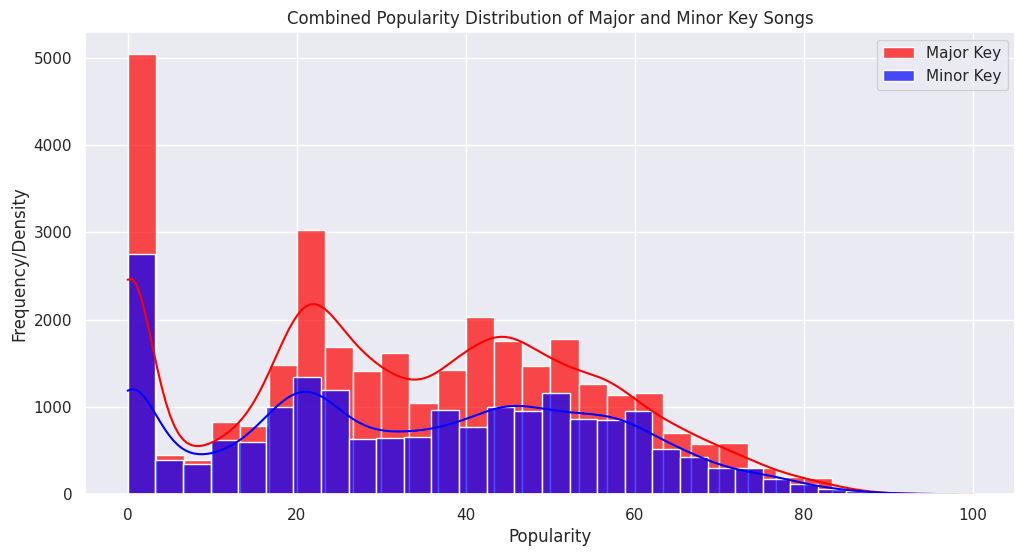

In [13]:
plt.figure(figsize=(12, 6))

# Histogram and density for major key songs
sns.histplot(major_key_songs['popularity'], bins=30, color='red', kde=True, label='Major Key', alpha=0.7)

# Histogram and density for minor key songs
sns.histplot(minor_key_songs['popularity'], bins=30, color='blue', kde=True, label='Minor Key', alpha=0.7)

plt.title('Combined Popularity Distribution of Major and Minor Key Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency/Density')
plt.legend()

plt.show()


In [14]:
t_statistic, p_value = stats.ttest_ind(major_key_songs['popularity'], minor_key_songs['popularity'], alternative='greater')
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: -4.82016820942977, p-value: 0.999999280792557


### 4) Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best?How good is this model?

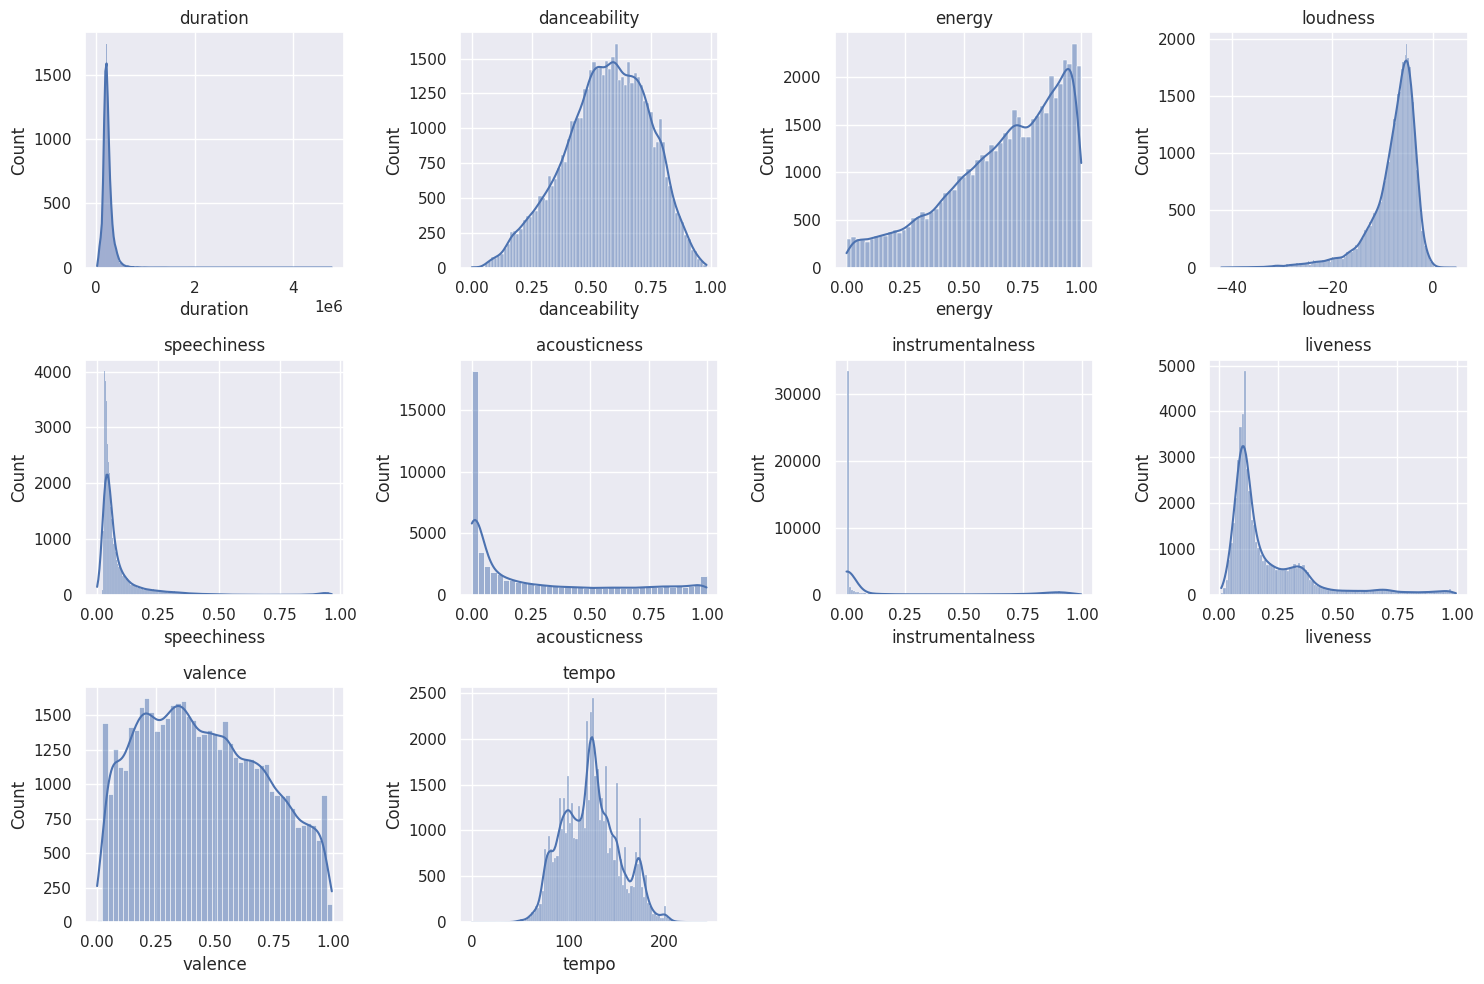

In [15]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
    plt.tight_layout()

plt.show()

In [16]:
# Features to be tested
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Dictionary to store R^2 values for each feature
r2_scores = {}

# Perform linear regression for each feature
for feature in features:
    # Reshaping the data for sklearn
    X = df[[feature]].values.reshape(-1, 1)
    y = df['popularity'].values

    # Fitting the model
    reg = LinearRegression().fit(X, y)
    y_hat = reg.predict(X)

    # Calculating R^2 score
    r2 = r2_score(y, y_hat)
    r2_scores[feature] = r2

# Converting the results to a DataFrame for easier ranking and visualization
r2_scores_df = pd.DataFrame(list(r2_scores.items()), columns=['Feature', 'R^2 Score']).sort_values(by='R^2 Score', ascending=False)

r2_scores_df


,Feature,R^2 Score
6,instrumentalness,0.021017
3,loudness,0.003625
2,energy,0.003128
0,duration,0.002987
4,speechiness,0.002355
7,liveness,0.001922
1,danceability,0.001381
8,valence,0.001279
5,acousticness,0.000688
9,tempo,0.000007


In [17]:
r2_scores = {}

# Perform random forest regression for each feature
for feature in features:
    # Reshaping the data for sklearn
    X = df[[feature]].values.reshape(-1, 1)
    y = df['popularity'].values

    # Fitting the model
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=19329713)
    rf_reg.fit(X, y)
    y_hat = rf_reg.predict(X)

    # Calculating R^2 score
    r2 = r2_score(y, y_hat)
    r2_scores[feature] = r2

# Converting the results to a DataFrame for easier ranking and visualization
r2_scores_df = pd.DataFrame(list(r2_scores.items()), columns=['Feature', 'R^2 Score']).sort_values(by='R^2 Score', ascending=False)

r2_scores_df

,Feature,R^2 Score
0,duration,0.643402
9,tempo,0.606115
3,loudness,0.376893
5,acousticness,0.159760
6,instrumentalness,0.123671
2,energy,0.075572
8,valence,0.066103
7,liveness,0.062653
4,speechiness,0.059608
1,danceability,0.049276


### 5) Building a model that uses *all* of the song features mentioned in question 4, how well can you predict popularity? How much (if at all) is this model improved compared to the model in question 4). How do you account for this? What happens if you regularize your model?

In [18]:
from sklearn.linear_model import Ridge

# Multiple linear regression model
X_multivariate = df[features]
y_multivariate = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X_multivariate, y_multivariate, test_size=0.3, random_state=42)

# Building the multivariate linear regression model
multivariate_model = LinearRegression()
multivariate_model.fit(X_train, y_train)

# Predicting and calculating R^2 score for the multivariate model
predictions_multivariate = multivariate_model.predict(X_test)
r2_multivariate = r2_score(y_test, predictions_multivariate)
rmse_multivariate = np.sqrt(mean_squared_error(y_test, predictions_multivariate))

# Building and evaluating a regularized model (Ridge Regression)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, ridge_predictions)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_predictions))

# Output R^2 and RMSE
print(f"R^2 (Multivariate): {r2_multivariate}, RMSE (Multivariate): {rmse_multivariate}")
print(f"R^2 (Ridge): {r2_ridge}, RMSE (Ridge): {rmse_ridge}")


R^2 (Multivariate): 0.04634429898242698, RMSE (Multivariate): 21.16323150289822
R^2 (Ridge): 0.04634452088869023, RMSE (Ridge): 21.1632290406606


In [19]:
# Random Forest multivariate model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting and calculating R^2 score for the Random Forest model
predictions_random_forest = random_forest_model.predict(X_test)
r2_random_forest = r2_score(y_test, predictions_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, predictions_random_forest))

# Output the R^2 score and RMSE for the Random Forest model
print(f"R^2 (Random Forest): {r2_random_forest}, RMSE (Random Forest): {rmse_random_forest}")

R^2 (Random Forest): 0.40039579330046204, RMSE (Random Forest): 16.781026126511794


### 6) When considering the 10 song features in the previous question, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for? Using these principal components, how many clusters can you identify? Do these clusters reasonably correspond to the genre labels in column 20 of the data?

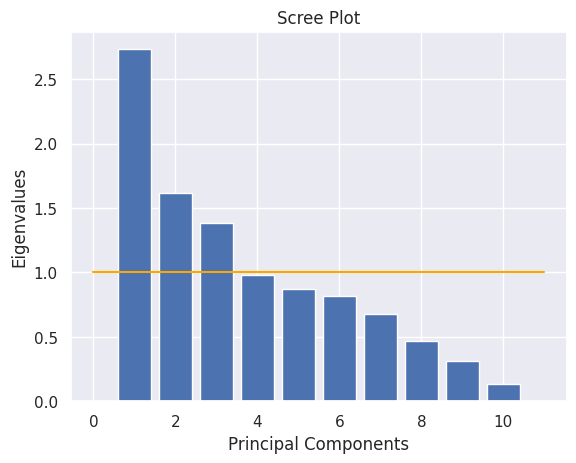

In [20]:
predictors = df[features]
nComponents = 11
# Z-score the data
zscoredData = stats.zscore(predictors)

# Initialize PCA object and fit to our data
pca = PCA().fit(zscoredData)

# Eigenvalues
eigVals = pca.explained_variance_

# Plot the eigenvalues (scree plot)
numPredictors = len(features)
plt.bar(np.arange(1, numPredictors + 1), eigVals)
plt.plot([0,nComponents],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

In [21]:
num_components = sum(eigVals > 1)
pca_transformed = PCA(n_components=num_components).fit_transform(zscoredData)
# Get the explained variance ratio of the selected components
explained_variance_ratio = PCA(n_components=num_components).fit(zscoredData).explained_variance_ratio_
total_variance_accounted = sum(explained_variance_ratio)

print(f"Total variance accounted for by the first {num_components} components: {total_variance_accounted * 100:.2f}%")

Total variance accounted for by the first 3 components: 57.36%


In [22]:
len(df['track_genre'].unique())

52

In [23]:
class DBSCAN:
    def region_query (self, p, eps, X):
        '''
        Generates boolean array of all data points which belong
        in epsilon neighborhood of p
        '''
        _, dim = X.shape
        assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))

        return np.linalg.norm (p - X, axis=1) <= eps

    def index_set (self, y):
        """
        Given a boolean vector, this function returns
        the indices of all True elements in the outputs
        of the region_query function
        """
        assert len (y.shape) == 1

        return set (np.where (y)[0])

    def find_neighbors (self, eps, X):
        """
        Finds epsilon neighbors for all points in the dataset.
        """
        m, d = X.shape
        neighbors = [] # Empty list to start

        for i in range (len (X)):
            n_i = self.index_set (self.region_query (X[i, :], eps, X))
            neighbors.append (n_i)
        assert len (neighbors) == m
        return neighbors

    def find_core_points (self, s, neighbors):
        """
        checks the neigbors list for each point
        and if density is greater than s then the
        point is added as a core point
        """
        assert type (neighbors) is list
        assert all ([type (n) is set for n in neighbors])

        core_set = set ()
        for i, n_i in enumerate (neighbors):
            if len (n_i) >= s:
                core_set.add (i)
        return core_set

    def expand_cluster (self, p, neighbors, core_set, visited, assignment):
        """
        Given a core point for which cluster label has been assigned, the reachable
        points from there is expanded.
        """
        # Assume the caller performs Steps 1 and 2 of the procedure.
        # That means 'p' must be a core point that is part of a cluster.
        assert (p in core_set) and (p in visited) and (p in assignment)

        reachable = set (neighbors[p])  # Step 3
        while reachable:
            q = reachable.pop () # Step 4

            # Put your reordered and correctly indented statements here:
            if q not in visited:
                visited.add (q) # Mark q as visited
                if q in core_set:
                    reachable |= neighbors[q]
            if q not in assignment:
                assignment[q] = assignment[p]

    def __call__(self, eps, s, X):
        """
        Function which puts together all the helper function
        and runs the DBSCAN algorithm.
        """
        clusters = []
        point_to_cluster = {}

        neighbors = self.find_neighbors (eps, X)
        core_set = self.find_core_points (s, neighbors)

        assignment = {}
        next_cluster_id = 0

        visited = set ()
        for i in core_set: # for each core point i
            if i not in visited:
                visited.add (i) # Mark i as visited
                assignment[i] = next_cluster_id
                self.expand_cluster (i, neighbors, core_set,
                                visited, assignment)
                next_cluster_id += 1

        return assignment, core_set

In [24]:
# Initialize DBSCAN instance
dbscan = DBSCAN()

assignment, coreset = dbscan(0.59, 500, pca_transformed)


In [25]:
print ("Number of core points:", len (coreset))
print ("Number of clusters:", max (assignment.values ())+1)
print ("Number of unclassified points:", len (pca_transformed) - len (assignment))

Number of core points: 32555
Number of clusters: 1
Number of unclassified points: 9872


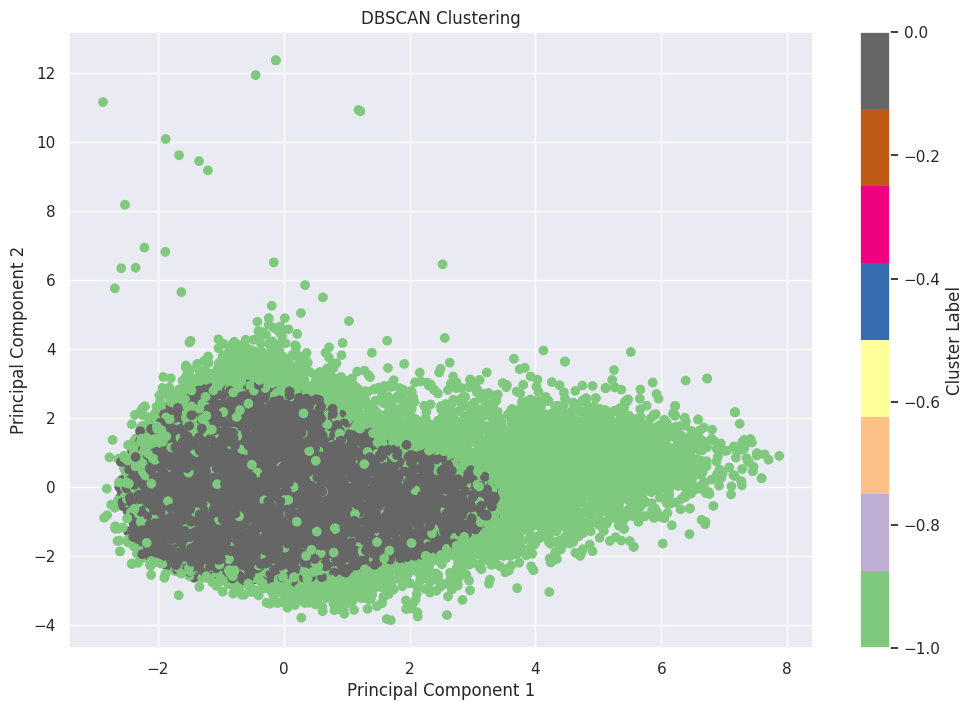

In [26]:
# Assuming `pca_transformed` is your dataset and `assignment` is from DBSCAN
labels = [-1] * len(pca_transformed)
for i, c in assignment.items():
    labels[i] = c

plt.figure(figsize=(12, 8))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels, cmap='Accent')
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


In [27]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 15)  # Range of possible number of clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_transformed, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

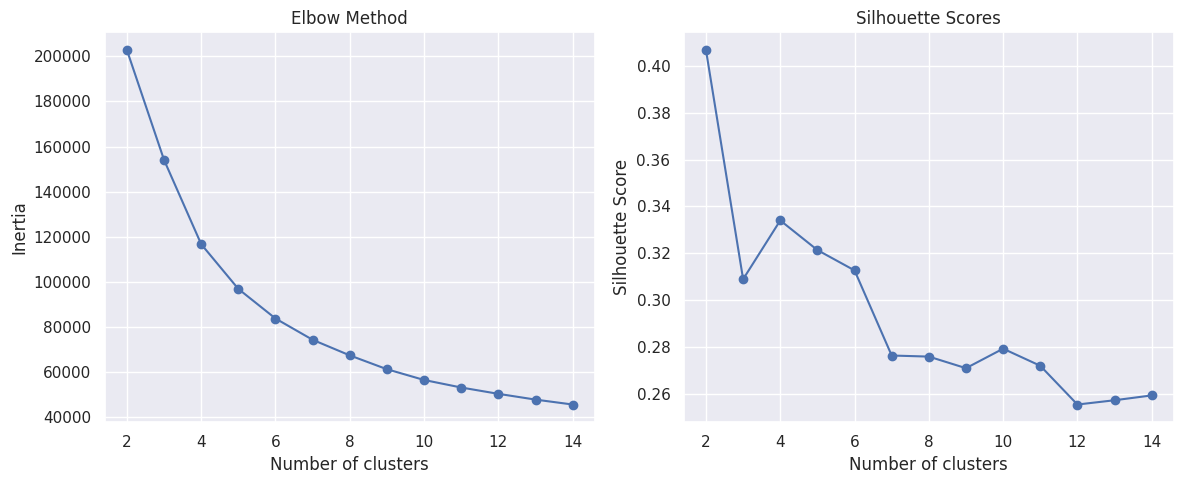

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

With 52 unique genres in the dataset, neither method suggests a close correspondence to this number of clusters. The high number of genres compared to the optimal cluster numbers suggested by the Elbow Method and Silhouette Scores indicates that the genre classification may be too fine-grained or that the features may not capture all the nuances that distinguish 52 separate genres.

### 7) Can you predict whether a song is in major or minor key from valence using logistic regression or a support vector machine? If so, how good is this prediction? If not, is there a better one?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic model accuracy: 0.6230769230769231
logistic classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3920
           1       0.62      1.00      0.77      6480

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.39      0.62      0.48     10400

logistic roc auc: 0.5


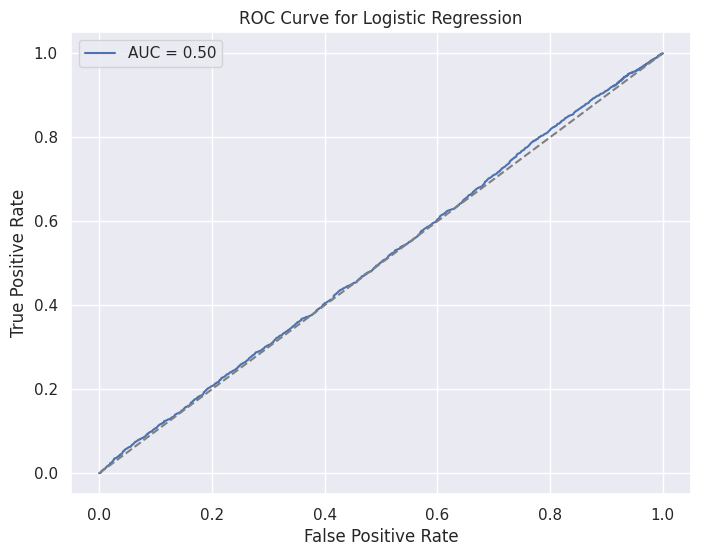

In [29]:
# Data Preparation
X = df[['valence']].values
y = df['mode'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19329713)

# Model Training: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Model Prediction: Logistic Regression
logistic_predictions = logistic_model.predict(X_test)
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]

# Model Evaluation: Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_classification_report = classification_report(y_test, logistic_predictions)
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)
print('logistic model accuracy:', logistic_accuracy)
print('logistic classification report:',logistic_classification_report)
print('logistic roc auc:', logistic_roc_auc)


# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {logistic_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

SVM model accuracy: 0.6230769230769231
svm classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3920
           1       0.62      1.00      0.77      6480

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.39      0.62      0.48     10400

svm roc auc: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


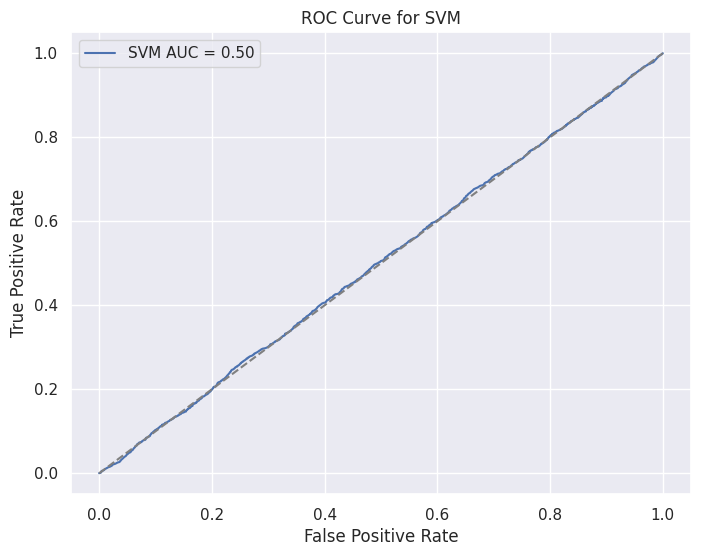

In [30]:
# Model Training: Support Vector Machine
svm_model = svm.SVC(probability=True).fit(X_train, y_train)
# Model Prediction: Support Vector Machine
svm_predictions = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Model Evaluation: SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('SVM model accuracy:', svm_accuracy)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)
print('svm classification report:',svm_classification_report)
print('svm roc auc:', svm_roc_auc)

# Calculating the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_probs)

# Plotting the ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {svm_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.45      0.13      0.20      3920
           1       0.63      0.90      0.74      6480

    accuracy                           0.61     10400
   macro avg       0.54      0.52      0.47     10400
weighted avg       0.56      0.61      0.54     10400

Random Forest AUC Score: 0.5160808767951626


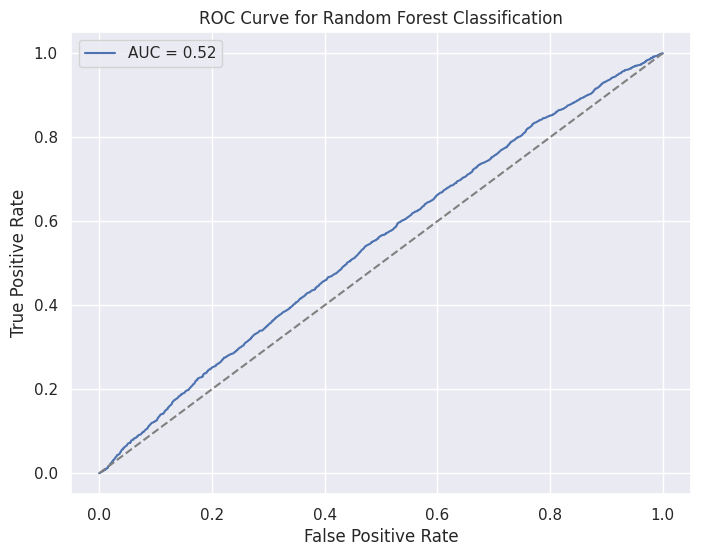

In [31]:
# Random Forest
forest_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
# Output some metrics
forest_auc_roc = roc_auc_score(y_test, forest_pred)
forest_classification_report = classification_report(y_test, forest_pred)
print(forest_classification_report)

forest_probs = forest_model.predict_proba(X_test)[:, 1]
print("Random Forest AUC Score:", forest_auc_roc)

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, forest_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {forest_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classification')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.45      0.15      0.23      3920
           1       0.63      0.89      0.74      6480

    accuracy                           0.61     10400
   macro avg       0.54      0.52      0.48     10400
weighted avg       0.56      0.61      0.55     10400

Random Forest AUC Score: 0.5189184933232552


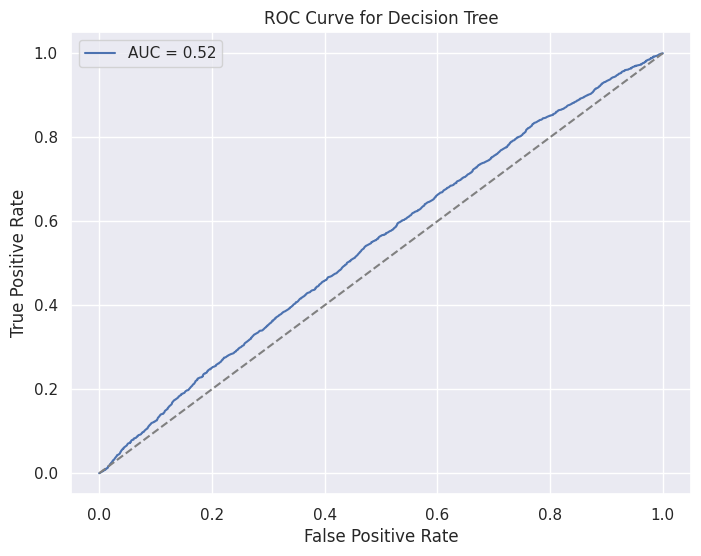

In [32]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
# Output some metrics
tree_auc_roc = roc_auc_score(y_test, tree_predictions)
tree_classification_report = classification_report(y_test, tree_predictions)
print(tree_classification_report)

tree_probs = forest_model.predict_proba(X_test)[:, 1]
print("Random Forest AUC Score:", tree_auc_roc)

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, tree_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {tree_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

### 8) Can you predict genre by using the 10 song features from question 4 directly or the principal components you extracted in question 6 with a neural network? How well does this work?

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Base classes for neural network modules
class Module(object):
    def __init__(self):
        self.gradInput = None
        self.output = None

    def forward(self, *input):
        raise NotImplementedError

    def backward(self, *input):
        raise NotImplementedError

class LeastSquareCriterion(Module):
    # Assuming one-hot encoded target
    def forward(self, x, labels):
        self.output = np.sum((labels - x) ** 2, axis=0)
        return np.sum(self.output)

    def backward(self, x, labels):
        self.gradInput = 2 * (x - labels)
        return self.gradInput

class Linear(Module):
    def __init__(self, in_features, out_features, bias=True):
        self.in_features = in_features
        self.out_features = out_features
        self.weight = np.random.randn(out_features, in_features) * np.sqrt(1. / in_features)
        self.bias = np.zeros(out_features) if bias else None
        self.gradWeight = None
        self.gradBias = None

    def forward(self, x):
        self.output = np.dot(x, self.weight.T)
        if self.bias is not None:
            self.output += self.bias.reshape(1, -1)
        return self.output

    def backward(self, x, gradOutput):
        self.gradInput = np.dot(gradOutput, self.weight)
        self.gradWeight = np.dot(gradOutput.T, x)
        self.gradBias = np.sum(gradOutput, axis=0)
        return self.gradInput

    def gradientStep(self, lr):
        self.weight -= lr * self.gradWeight
        if self.bias is not None:
            self.bias -= lr * self.gradBias

class ReLU(Module):
    def forward(self, x):
        self.output = np.maximum(0, x)
        return self.output

    def backward(self, x, gradOutput):
        self.gradInput = gradOutput * (x > 0)
        return self.gradInput

class MLP(Module):
    def __init__(self, in_features, num_classes):
        super(MLP, self).__init__()
        self.fc1 = Linear(in_features, 64)
        self.relu1 = ReLU()
        self.fc2 = Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1.forward(x)
        x = self.relu1.forward(x)
        x = self.fc2.forward(x)
        return x

    def backward(self, x, gradient):
        gradient = self.fc2.backward(self.relu1.output, gradient)
        gradient = self.relu1.backward(self.fc1.output, gradient)
        gradient = self.fc1.backward(x, gradient)
        return gradient

    def gradientStep(self, lr):
        self.fc2.gradientStep(lr)
        self.fc1.gradientStep(lr)

In [34]:
# Function to train the model
def train_model(num_epochs, learn_rate, batch_size, model, criterion, train_data, train_labels, val_data, val_labels):
    n_train, n_val = len(train_data), len(val_data)
    train_loss = np.empty(num_epochs)
    val_loss = np.empty(num_epochs)

    for epoch in range(num_epochs):
        # Training loop
        for i in range(0, n_train, batch_size):
            x = train_data[i:i+batch_size]
            y = train_labels[i:i+batch_size]
            y_pred = model.forward(x)
            loss = criterion.forward(y_pred, y)
            train_loss[epoch] += loss
            grad0 = criterion.backward(y_pred, y)
            model.backward(x, grad0)
            model.gradientStep(learn_rate)

        train_loss[epoch] /= (n_train // batch_size)

        # Validation loop
        for j in range(0, n_val, batch_size):
            x = val_data[j:j+batch_size]
            y = val_labels[j:j+batch_size]
            y_pred = model.forward(x)
            val_loss[epoch] += criterion.forward(y_pred, y)

        val_loss[epoch] /= (n_val // batch_size)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss[epoch]:.4f}, Val Loss: {val_loss[epoch]:.4f}')

    # Plot training and validation loss
    plt.plot(range(1, num_epochs + 1), train_loss, label='Training Loss')
    plt.plot(range(1, num_epochs + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 10/50 - Train Loss: 56.9466, Val Loss: 57.2732
Epoch 20/50 - Train Loss: 56.1983, Val Loss: 56.6075
Epoch 30/50 - Train Loss: 55.8735, Val Loss: 56.3545
Epoch 40/50 - Train Loss: 55.6964, Val Loss: 56.1972
Epoch 50/50 - Train Loss: 55.5755, Val Loss: 56.0960


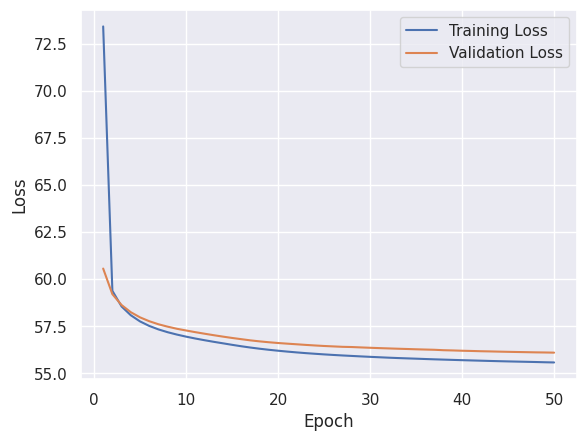

Model Accuracy: 0.2462


In [35]:
# Number of unique genres
num_genres = 52  # Replace with the actual number of unique genres in spotify_data

X = StandardScaler().fit_transform(df[features])
y = LabelEncoder().fit_transform(df['track_genre'])
y = np.eye(num_genres)[y]  # Convert labels to one-hot encoding

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and criterion
model = MLP(in_features=len(features), num_classes=num_genres)
criterion = LeastSquareCriterion()

# Train the model
num_epochs = 50
learn_rate = 0.001
batch_size = 64
train_model(num_epochs, learn_rate, batch_size, model, criterion, X_train, y_train, X_test, y_test)

# Function to evaluate model accuracy
def evaluate_model(model, data, labels, batch_size):
    correct_predictions = 0
    for i in range(0, len(data), batch_size):
        x = data[i:i+batch_size]
        y = labels[i:i+batch_size]
        y_pred = model.forward(x)
        correct_predictions += np.sum(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
    accuracy = correct_predictions / len(data)
    return accuracy

# Evaluate the model
model_accuracy = evaluate_model(model, X_test, y_test, batch_size)
print(f'Model Accuracy: {model_accuracy:.4f}')

Epoch 10/50 - Train Loss: 59.8112, Val Loss: 60.2314
Epoch 20/50 - Train Loss: 59.5033, Val Loss: 59.9806
Epoch 30/50 - Train Loss: 59.3517, Val Loss: 59.8517
Epoch 40/50 - Train Loss: 59.2557, Val Loss: 59.7671
Epoch 50/50 - Train Loss: 59.1948, Val Loss: 59.7201


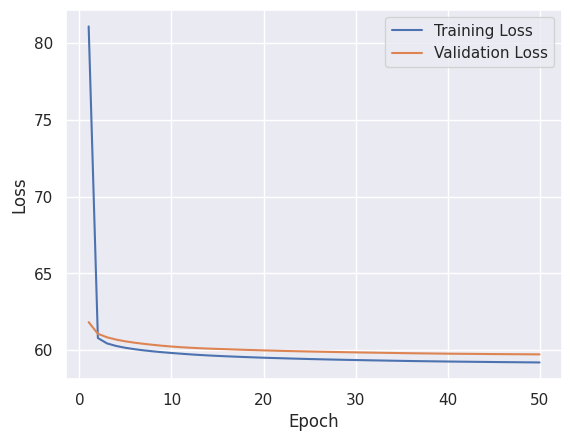

Model Accuracy: 0.1452


In [36]:
y = LabelEncoder().fit_transform(df['track_genre'])
y = np.eye(num_genres)[y]  # Convert labels to one-hot encoding

# Split the data
X_train, X_test, y_train, y_test = train_test_split(pca_transformed, y, test_size=0.2, random_state=42)

# Initialize the model with 3 input features (principal components)
model = MLP(in_features=3, num_classes=num_genres)
criterion = LeastSquareCriterion()

# Train the model
num_epochs = 50
learn_rate = 0.001
batch_size = 64
train_model(num_epochs, learn_rate, batch_size, model, criterion, X_train, y_train, X_test, y_test)

# Evaluate the model
model_accuracy = evaluate_model(model, X_test, y_test, batch_size)
print(f'Model Accuracy: {model_accuracy:.4f}')

### 9) In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard: a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for? b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

In [37]:
average_star_ratings = ratings_data.mean(axis=0)
ratings_data.mean(axis=0).isna().sum()

0

In [38]:
# Calculate the average star rating for each song
average_star_ratings = ratings_data.head(5000).mean(axis=0)

song_ratings_df = df[['album_name','songNumber','track_name', 'popularity','artists']].head(5000)
song_ratings_df['average_star_rating'] = average_star_ratings.values
song_ratings_df.head()

,album_name,songNumber,track_name,popularity,artists,average_star_rating
0,Comedy,0,Comedy,73,Gen Hoshino,0.3128
1,Ghost (Acoustic),1,Ghost - Acoustic,55,Ben Woodward,0.1424
2,To Begin Again,2,To Begin Again,57,Ingrid Michaelson;ZAYN,0.2442
3,Crazy Rich Asians (Original Motion Picture Sou...,3,Can't Help Falling In Love,71,Kina Grannis,0.1640
4,Hold On,4,Hold On,82,Chord Overstreet,0.3084


In [39]:
# a) Relationship between popularity and average star rating
# We will use a simple correlation to check the relationship
correlation_coefficient, p_value = pearsonr(song_ratings_df['popularity'],song_ratings_df['average_star_rating'])

correlation_coefficient, p_value

(0.5673412407653671, 0.0)

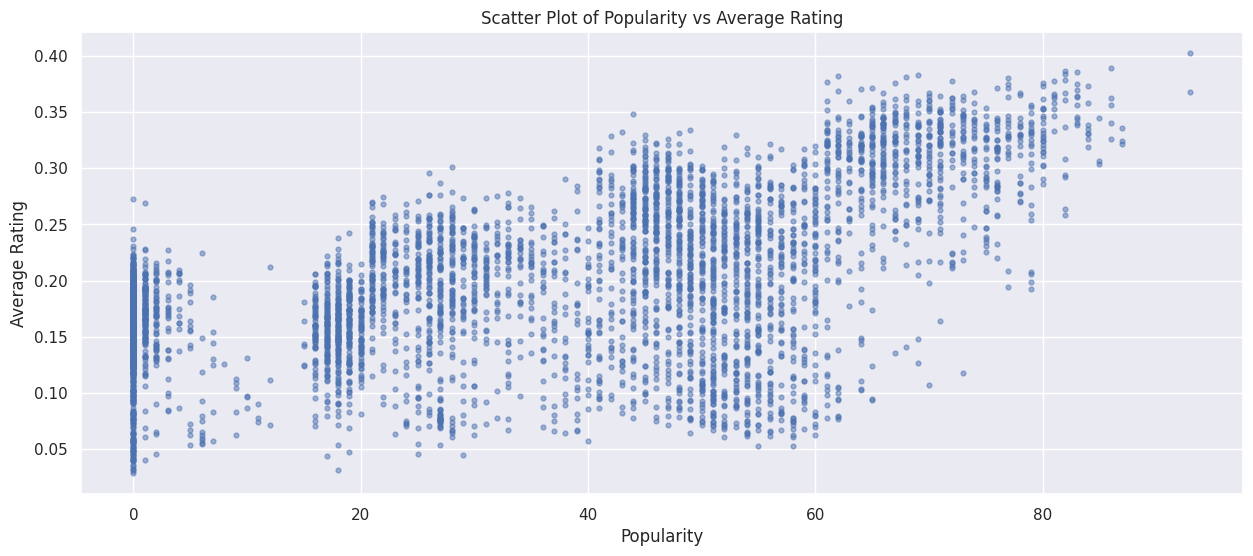

In [40]:
plt.figure(figsize=(15, 6))
plt.scatter(song_ratings_df['popularity'], song_ratings_df['average_star_rating'], alpha=0.5, s=12)
plt.title('Scatter Plot of Popularity vs Average Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [41]:
# Filter out unique songs
unique_songs = song_ratings_df.drop_duplicates(subset=['track_name','artists'])
unique_songs.head()

,album_name,songNumber,track_name,popularity,artists,average_star_rating
0,Comedy,0,Comedy,73,Gen Hoshino,0.3128
1,Ghost (Acoustic),1,Ghost - Acoustic,55,Ben Woodward,0.1424
2,To Begin Again,2,To Begin Again,57,Ingrid Michaelson;ZAYN,0.2442
3,Crazy Rich Asians (Original Motion Picture Sou...,3,Can't Help Falling In Love,71,Kina Grannis,0.1640
4,Hold On,4,Hold On,82,Chord Overstreet,0.3084


In [42]:
# b) Identifying the top 10 songs based on popularity based model
top_10_greatest_hits = unique_songs.sort_values(by='popularity', ascending=False).head(10)
top_10_greatest_hits

,album_name,songNumber,track_name,popularity,artists,average_star_rating
2003,I Love You.,2003,Sweater Weather,93,The Neighbourhood,0.4022
2000,Wiped Out!,2000,Daddy Issues,87,The Neighbourhood,0.3360
3004,abcdefu,3004,abcdefu,86,GAYLE,0.3890
2002,Hard To Imagine The Neighbourhood Ever Changing,2002,Softcore,86,The Neighbourhood,0.3264
2053,Pablo Honey,2053,Creep,85,Radiohead,0.3060
3006,Hybrid Theory (Bonus Edition),3006,In the End,85,Linkin Park,0.3450
4002,Cigarettes After Sex,4002,Apocalypse,84,Cigarettes After Sex,0.3386
3255,Demon Days,3255,Feel Good Inc.,84,Gorillaz,0.3312
2057,Elephant,2057,Seven Nation Army,84,The White Stripes,0.3352
2367,The Colour And The Shape,2367,Everlong,84,Foo Fighters,0.3192


### 10) You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user will enjoy most. How do these recommendations compare to the “greatest hits” from the previous question and how good is your recommender system in making recommendations?

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

spotify_data = df.head(5000)

# Remove duplicates in spotify_data while keeping the first occurrence
spotify_data_no_duplicates = spotify_data.drop_duplicates(subset=['track_name', 'artists'], keep='first')

# Aligning the ratings data with the spotify data
# Map each song in the ratings data to its corresponding row in the spotify data
song_indices = spotify_data_no_duplicates.index
aligned_ratings_data = ratings_data.iloc[:, song_indices]

# Convert the ratings data into a numpy array for similarity computation
ratings_matrix = aligned_ratings_data.to_numpy()

# Calculate the cosine similarity between users
user_similarity_matrix = cosine_similarity(ratings_matrix)

# The similarity matrix is a square matrix with the number of users as its dimensions
user_similarity_matrix.shape


(10000, 10000)

In [44]:
def get_top_n_recommendations(user_id, user_similarity_matrix, ratings_matrix, n=10):
    """
    Generate top N song recommendations for a given user based on user-user similarity.

    :param user_id: The ID of the user for whom to generate recommendations
    :param user_similarity_matrix: A matrix of user similarities
    :param ratings_matrix: The matrix of user ratings
    :param n: Number of top recommendations to return
    :return: List of song indices representing the top N recommendations
    """
    # Number of top similar users to consider
    num_top_users = 20

    # Get the similarity scores for the target user and sort them in descending order
    similarity_scores = list(enumerate(user_similarity_matrix[user_id]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Select the top 'num_top_users' users (excluding the target user itself)
    top_users_indices = [user[0] for user in similarity_scores[1:num_top_users+1]]

    # Aggregate the ratings of these users and calculate the mean rating for each song
    top_users_ratings = ratings_matrix[top_users_indices, :]
    mean_ratings = np.mean(top_users_ratings, axis=0)

    # Sort the songs based on these mean ratings and get the indices of the top 'n' songs
    top_songs_indices = np.argsort(mean_ratings)[::-1][:n]

    # Retrieve song details from the Spotify dataset for these top songs
    recommended_songs_details = spotify_data.loc[top_songs_indices, ['songNumber', 'track_name', 'artists', 'popularity']]
    recommended_songs_details['Average Rating'] = mean_ratings[top_songs_indices]

    return recommended_songs_details

# Example: Generate top 10 recommendations for a specific user (e.g., user with ID 0)
get_top_n_recommendations(0, user_similarity_matrix, ratings_matrix, n=10)



,songNumber,track_name,artists,popularity,Average Rating
1897,1897,Bienvenida,Jorge Drexler,18,1.55
2293,2293,Dragula,Rob Zombie,0,1.55
1895,1895,Sincronia,Samuca e a Selva,16,1.40
2460,2460,Are You Gonna Be My Girl,Jet,76,1.30
2480,2480,Miss World,Hole,0,1.20
991,991,Little Life,Frank Turner,25,1.15
565,565,Sappy - Early Demo,Kurt Cobain,50,1.05
2346,2346,Corazones Rojos,Los Prisioneros,0,1.00
37,37,Throwing Good After Bad,Brandi Carlile,0,1.00
2613,2613,Cough Syrup,Young the Giant,71,1.00


In [46]:
def get_top_10_user_ratings(ratings_data):
    top_10_ratings = []
    for index, row in ratings_data.iterrows():
        # Sort the songs based on ratings and get the ratings of the top 10 songs
        top_ratings = row.sort_values(ascending=False).head(10).values.tolist()
        top_10_ratings.append(top_ratings)
    return top_10_ratings

# Extract top 10 rated songs (ratings) for each user
actual_data = get_top_10_user_ratings(ratings_data)

'''
predicted_data = []

for user_id in range(len(actual_data)):  # Example for 1000 users
    # Get top 10 recommended song indices
    recommended_songs = get_top_n_recommendations(user_id, user_similarity_matrix, ratings_matrix, n=10)
    # Retrieve the corresponding ratings for these songs from the user's ratings
    user_ratings = ratings_matrix[user_id, recommended_songs['songNumber']]
    predicted_data.append(user_ratings.tolist())
'''


"\npredicted_data = []\n\nfor user_id in range(len(actual_data)):  # Example for 1000 users\n    # Get top 10 recommended song indices\n    recommended_songs = get_top_n_recommendations(user_id, user_similarity_matrix, ratings_matrix, n=10)\n    # Retrieve the corresponding ratings for these songs from the user's ratings\n    user_ratings = ratings_matrix[user_id, recommended_songs['songNumber']]\n    predicted_data.append(user_ratings.tolist())\n"

In [47]:
def convert_to_binary(ratings, threshold=4.0):
    """
    Convert ratings to binary format (liked/not liked) based on a threshold.

    :param ratings: List of ratings
    :param threshold: Threshold above which songs are considered liked
    :return: Binary list indicating liked (1) or not liked (0)
    """
    return [1 if rating >= threshold else 0 for rating in ratings]

def calculate_precision_recall(predicted_ratings, actual_ratings, threshold=4.0):
    """
    Calculate precision and recall for predicted ratings.

    :param predicted_ratings: List of predicted ratings
    :param actual_ratings: List of actual ratings
    :param threshold: Threshold for considering a song as liked
    :return: Tuple containing precision and recall
    """
    predicted_binary = convert_to_binary(predicted_ratings, threshold)
    actual_binary = convert_to_binary(actual_ratings, threshold)

    true_positives = sum(p and a for p, a in zip(predicted_binary, actual_binary))
    predicted_positives = sum(predicted_binary)
    actual_positives = sum(actual_binary)

    precision = true_positives / predicted_positives if predicted_positives else 0
    recall = true_positives / actual_positives if actual_positives else 0

    return precision, recall



In [48]:
# Initialize lists to store precision and recall for each user
precisions = []
recalls = []

num_users = 10000
for user_id in range(num_users):
    # Get the actual top-rated songs for the user
    actual_rating = actual_data[user_id]

    # Get top 10 recommended songs for the user
    recommended_songs = get_top_n_recommendations(user_id, user_similarity_matrix, ratings_matrix, n=10)
    user_ratings = ratings_matrix[user_id, recommended_songs['songNumber']]
    recommended_ratings = user_ratings.tolist()

    # Calculate precision and recall
    precision, recall = calculate_precision_recall(recommended_ratings, actual_rating)

    # Append to the lists
    precisions.append(precision)
    recalls.append(recall)

# Calculate average precision and recall across all evaluated users
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")


Average Precision: 0.9994416666666666
Average Recall: 0.5509674603174604


### Extra credit: Can we use features tempo and key to predict danceability?


In [49]:
# Prepare data
X = df[['tempo', 'key']]
y = df['danceability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 19329713)

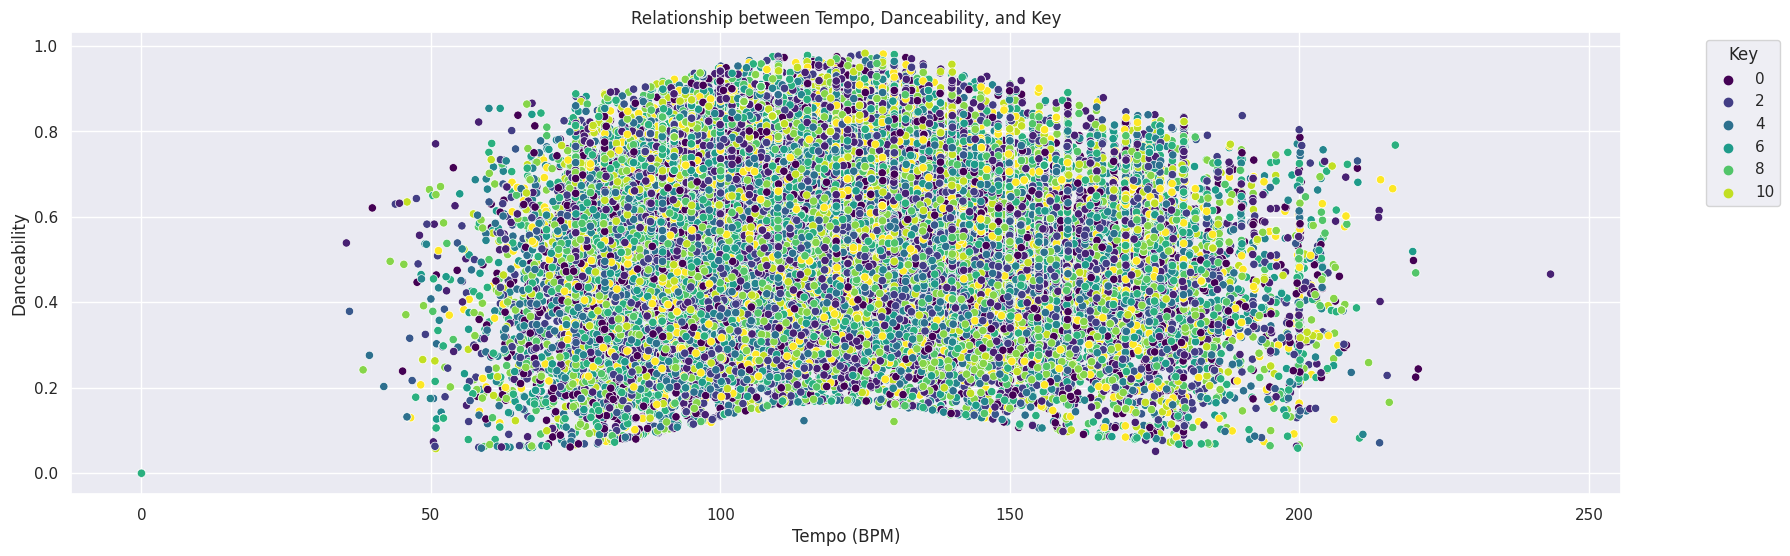

In [50]:
# Create a scatterplot with tempo, danceability, and key
plt.figure(figsize=(20, 6))
sns.scatterplot(x='tempo', y='danceability', hue='key', data=df, palette='viridis')
plt.title('Relationship between Tempo, Danceability, and Key')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Danceability')
plt.legend(title='Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
# Fit random forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=19329713)
random_forest.fit(X_train, y_train)

random_forest_preds = random_forest.predict(X_test)

random_forest_r2 = r2_score(y_test, random_forest_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_rmse = np.sqrt(random_forest_mse)

print(f'Random Forest R-squared: {random_forest_r2}')
print(f'Random Forest RMSE: {random_forest_rmse}')

Random Forest R-squared: 0.1977481733858264
Random Forest RMSE: 0.15817192131403277
